In [71]:
import os
from utils import plot_random_images

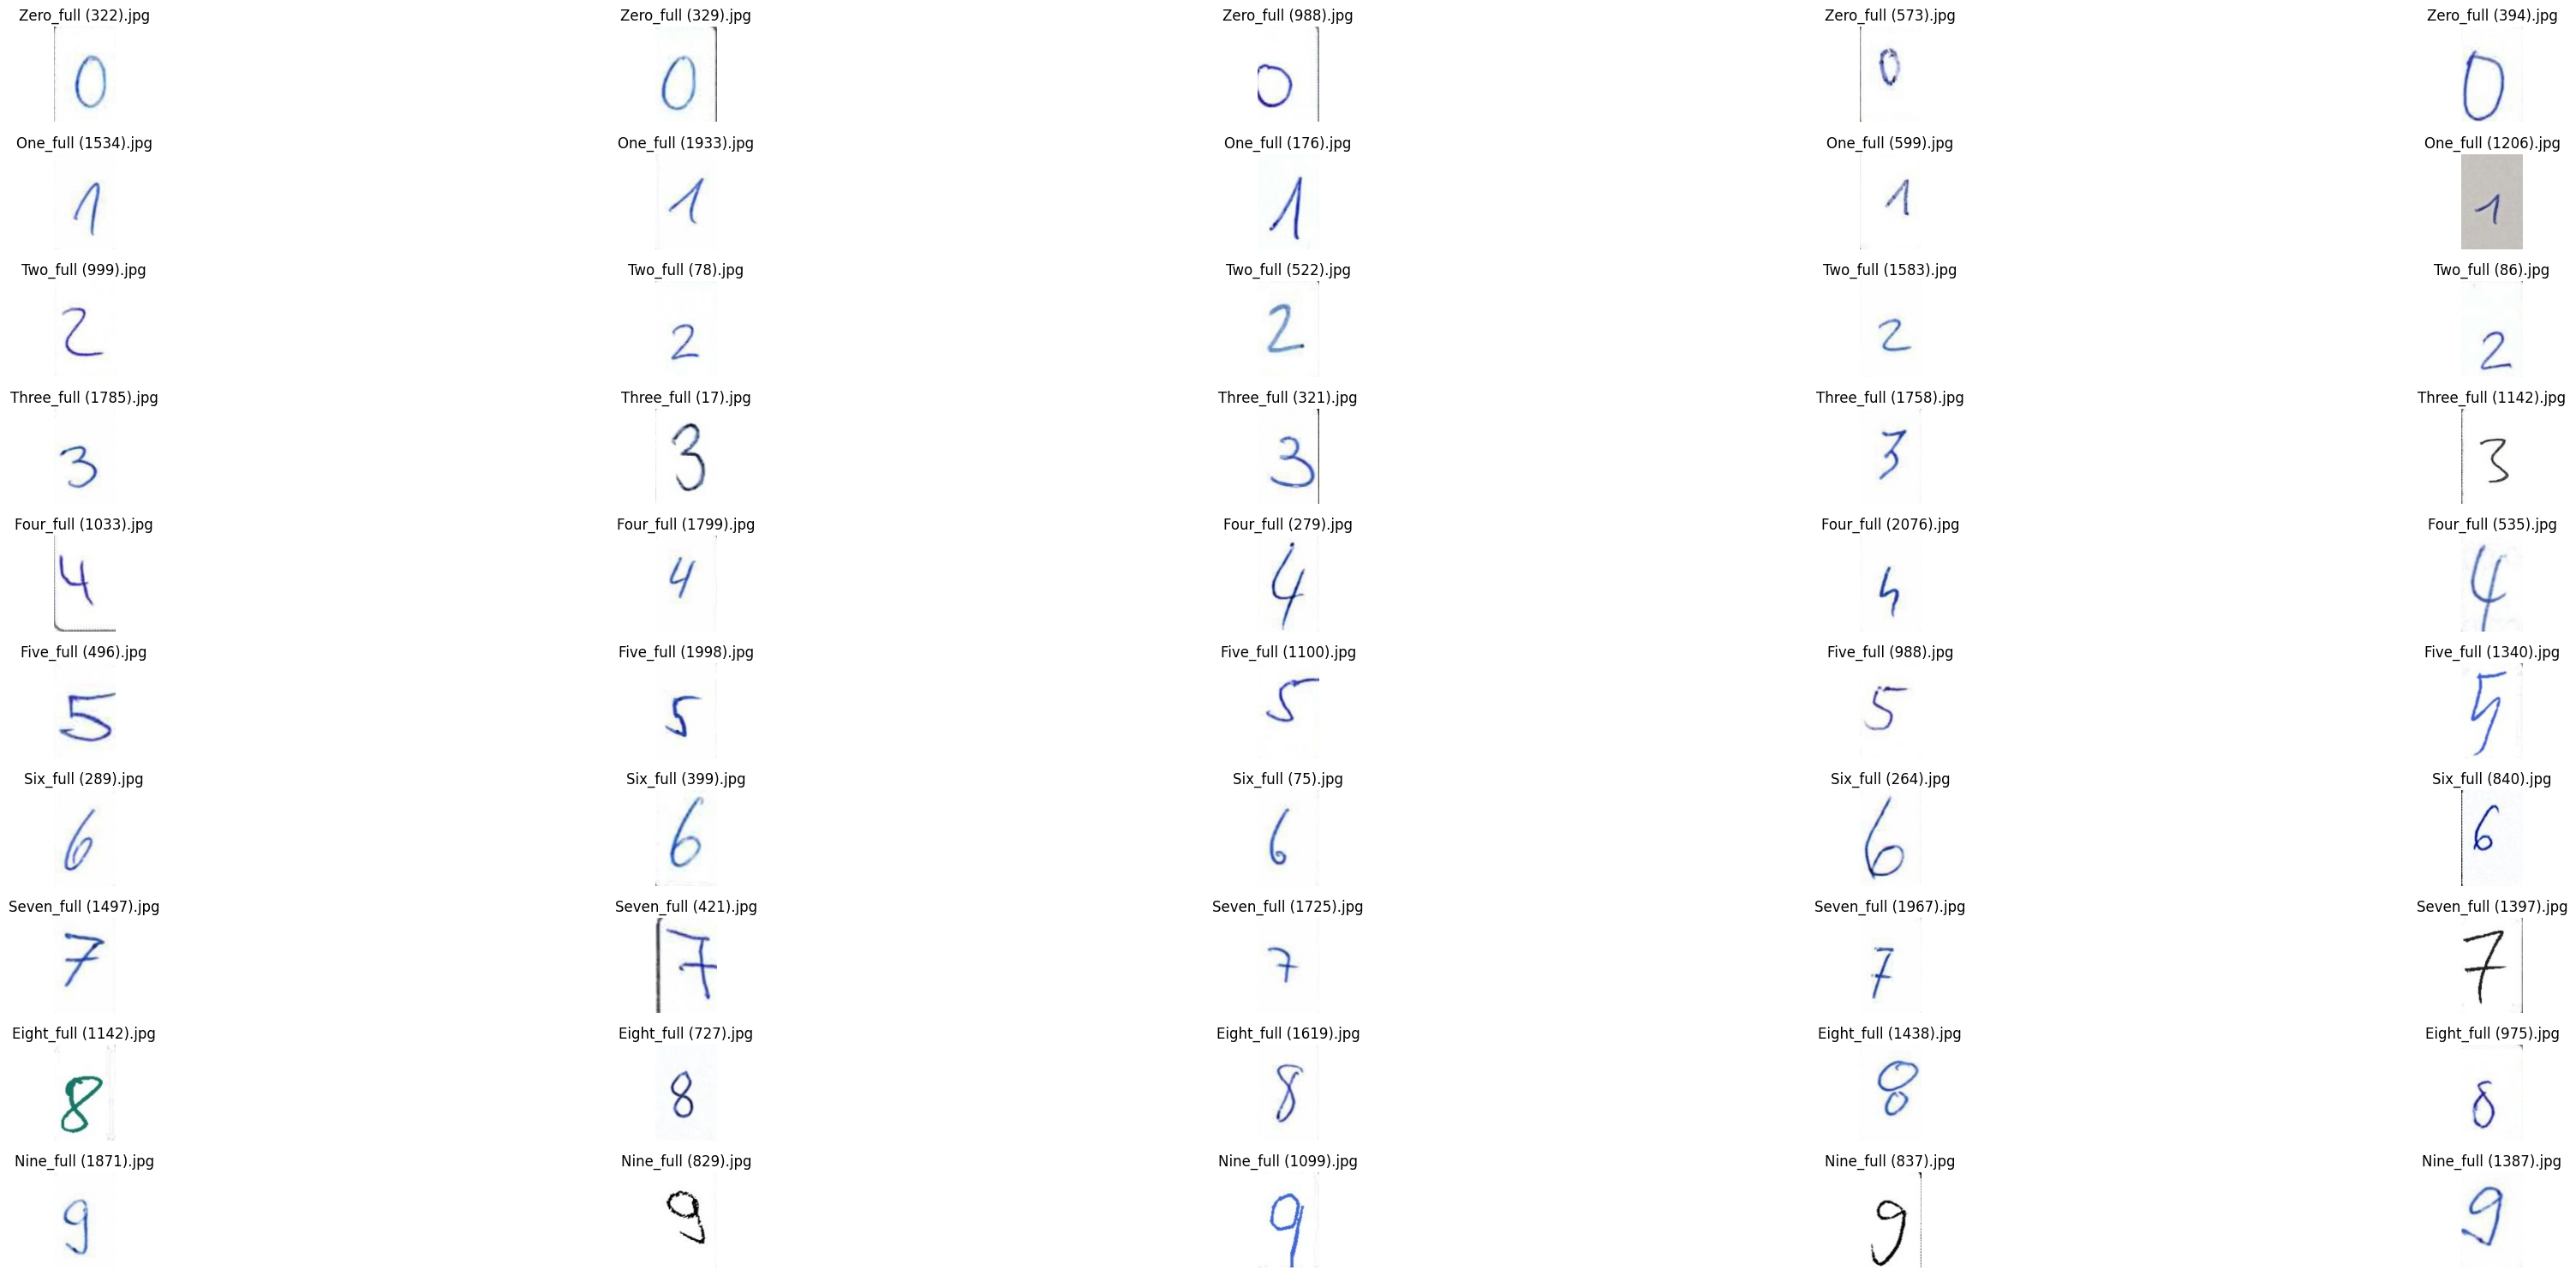

In [72]:
data_dir = os.path.join(os.getcwd(),'dataset')

plot_random_images(data_dir)